In [1]:
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import randn
import pandas as pd
import math
import pingouin as pg
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from IPython.display import display

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', 80)


%matplotlib inline

In [2]:
data = pd.read_excel("230810_HE_correlate_1927_SOM_retry.xlsx", sheet_name = "correlation_Lym (2)"
                     ,skiprows=[4,5,6,7,8,9,10,11,12,14,15,16,17] 
                     ,header=None,index_col=0).T
data

,Sample,FFPE_ID,がん種,MEnet,Lym,NaN,NaN,NaN,NaN
1,PK2h_DC2h,H2009233-1,SCC,0.159245,0.578836,NaN,NaN,PK2h_DC2h,0.159245
2,WGBS16-22_16_FFPE_183,H2100094-1,Melanoma,0.149016,0.721955,NaN,NaN,WGBS16-22_16_FFPE_183,0.149016
3,WGBS16-22_17_FFPE_184,H2100551-2,Melanoma,0.435179,0.75953,NaN,NaN,WGBS16-22_17_FFPE_184,0.435179
4,WGBS16-22_18_FFPE_185,H2100550-2,SCC,0.0645853,0.802156,NaN,NaN,WGBS16-22_18_FFPE_185,0.0645853
5,WGBS16-22_20_FFPE_187,H2101326-1,SCC,0.00752026,0.600813,NaN,NaN,WGBS16-22_20_FFPE_187,0.00752026
6,WGBS16-22_22_FFPE_191,H2102572-1,Melanoma,0.0662738,0.700247,NaN,NaN,WGBS16-22_22_FFPE_191,0.0662738
7,WGBS23-28_30_23_FFPE_194,H2103616-1,Melanoma,0.896746,0.82837,NaN,NaN,WGBS23-28_30_23_FFPE_194,0.896746
8,WGBS23-28_30_24_FFPE_195,H2103892-1,SCC,0.0226668,0.683282,NaN,NaN,WGBS23-28_30_24_FFPE_195,0.0226668
9,WGBS23-28_30_25_FFPE_196,H2103895-1,SCC,0.112724,0.766032,NaN,NaN,WGBS23-28_30_25_FFPE_196,0.112724
10,WGBS23-28_30_27_FFPE_200,H2104472-1,Melanoma,0.948118,0.84285,NaN,NaN,WGBS23-28_30_27_FFPE_200,0.948118


In [3]:
data_ob = data[["Sample","FFPE_ID","がん種"]]

data_f = data[["MEnet","Lym"]]
data_f = data_f.astype(float)

df = data_ob.merge(data_f,left_index=True,right_index=True)
df

,Sample,FFPE_ID,がん種,MEnet,Lym
1,PK2h_DC2h,H2009233-1,SCC,0.159245,0.578836
2,WGBS16-22_16_FFPE_183,H2100094-1,Melanoma,0.149016,0.721955
3,WGBS16-22_17_FFPE_184,H2100551-2,Melanoma,0.435179,0.759530
4,WGBS16-22_18_FFPE_185,H2100550-2,SCC,0.064585,0.802156
5,WGBS16-22_20_FFPE_187,H2101326-1,SCC,0.007520,0.600813
6,WGBS16-22_22_FFPE_191,H2102572-1,Melanoma,0.066274,0.700247
7,WGBS23-28_30_23_FFPE_194,H2103616-1,Melanoma,0.896746,0.828370
8,WGBS23-28_30_24_FFPE_195,H2103892-1,SCC,0.022667,0.683282
9,WGBS23-28_30_25_FFPE_196,H2103895-1,SCC,0.112724,0.766032
10,WGBS23-28_30_27_FFPE_200,H2104472-1,Melanoma,0.948118,0.842850


In [4]:
df_M = df[df['がん種'] != 'SCC']
df_M.head()

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Sample,FFPE_ID,がん種,MEnet,Lym
2,WGBS16-22_16_FFPE_183,H2100094-1,Melanoma,0.149016,0.721955
3,WGBS16-22_17_FFPE_184,H2100551-2,Melanoma,0.435179,0.759530
6,WGBS16-22_22_FFPE_191,H2102572-1,Melanoma,0.066274,0.700247
7,WGBS23-28_30_23_FFPE_194,H2103616-1,Melanoma,0.896746,0.828370
10,WGBS23-28_30_27_FFPE_200,H2104472-1,Melanoma,0.948118,0.842850


/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
df_S = df[df['がん種'] != 'Melanoma']
df_S.head()

,Sample,FFPE_ID,がん種,MEnet,Lym
1,PK2h_DC2h,H2009233-1,SCC,0.159245,0.578836
4,WGBS16-22_18_FFPE_185,H2100550-2,SCC,0.064585,0.802156
5,WGBS16-22_20_FFPE_187,H2101326-1,SCC,0.007520,0.600813
8,WGBS23-28_30_24_FFPE_195,H2103892-1,SCC,0.022667,0.683282
9,WGBS23-28_30_25_FFPE_196,H2103895-1,SCC,0.112724,0.766032


In [6]:
df_2 = df[df['FFPE_ID'] != 'H2009233-1']
df_2.head()

,Sample,FFPE_ID,がん種,MEnet,Lym
2,WGBS16-22_16_FFPE_183,H2100094-1,Melanoma,0.149016,0.721955
3,WGBS16-22_17_FFPE_184,H2100551-2,Melanoma,0.435179,0.759530
4,WGBS16-22_18_FFPE_185,H2100550-2,SCC,0.064585,0.802156
5,WGBS16-22_20_FFPE_187,H2101326-1,SCC,0.007520,0.600813
6,WGBS16-22_22_FFPE_191,H2102572-1,Melanoma,0.066274,0.700247


<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(byte

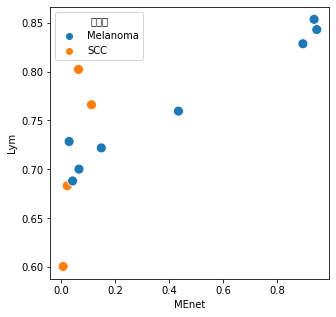

In [7]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="MEnet", y="Lym", data=df_2,hue="がん種",s=100)

<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(byte

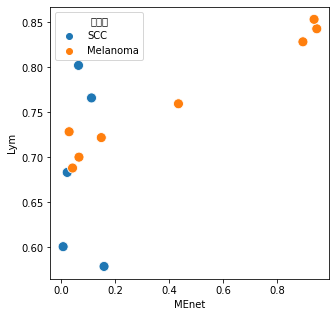

In [8]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="MEnet", y="Lym", data=df,hue="がん種",s=100)

<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(byte

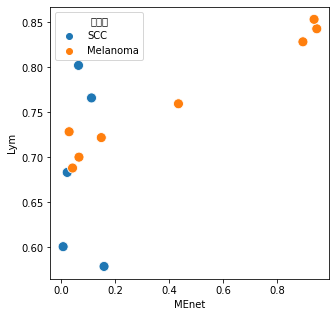

In [9]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="MEnet", y="Lym", data=df,hue="がん種",s=100)

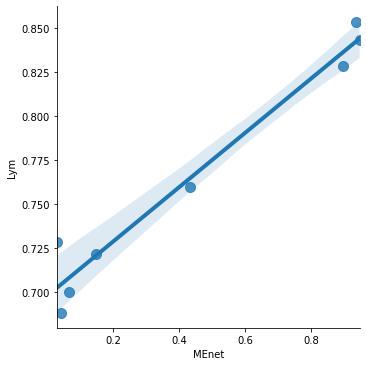

In [10]:

    
# lmplot を実行
g = sns.lmplot(x='MEnet', y='Lym', data=df_M, sharey=False, sharex=False,
                scatter_kws={'s': 100}, # これでドットのサイズを変更
                line_kws={'lw': 4}) # これで回帰曲線のサイズを変更
    
# サブプロットをPDFとして保存
g.savefig(f'./230819_plot.pdf')

<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(byte

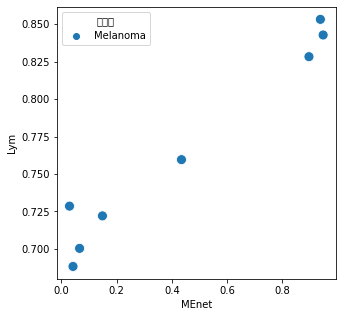

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="MEnet", y="Lym", data=df_M,hue="がん種",s=100)

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:142: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:142: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:142: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:151: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:151: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N})

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  func(*args, **kwargs)


<Figure size 360x360 with 0 Axes>

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


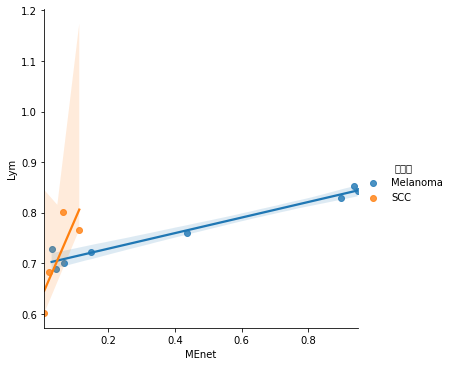

In [29]:
plt.figure(figsize=(5,5))
sns.lmplot(x="MEnet", y="Lym", data=df_2,hue="がん種")

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:142: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:142: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:142: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:151: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  self.fig.draw(self.fig.canvas.get_renderer())
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:151: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N})

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  func(*args, **kwargs)


<Figure size 360x360 with 0 Axes>

/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hagiwaramasaki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


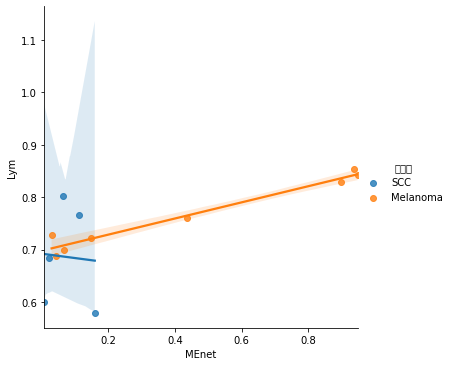

In [14]:
plt.figure(figsize=(5,5))
sns.lmplot(x="MEnet", y="Lym", data=df,hue="がん種")

<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

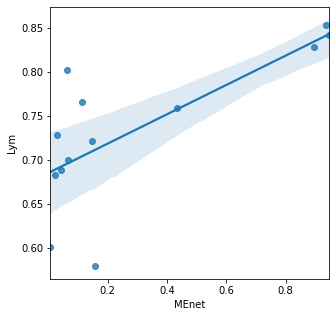

In [15]:
plt.figure(figsize=(5,5))
sns.regplot(x="MEnet", y="Lym", data=df)

<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

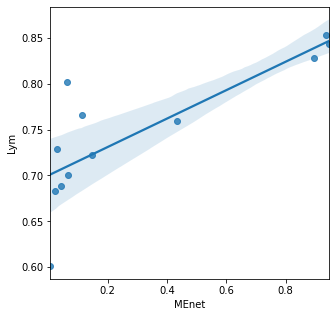

In [25]:
plt.figure(figsize=(5,5))
sns.regplot(x="MEnet", y="Lym", data=df_2)

<AxesSubplot:xlabel='MEnet', ylabel='Lym'>

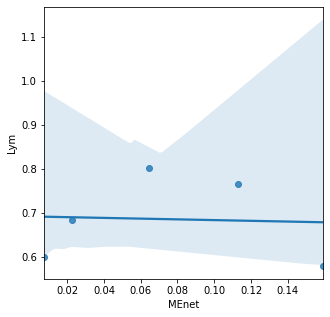

In [28]:
plt.figure(figsize=(5,5))
sns.regplot(x="MEnet", y="Lym", data=df_S)

In [16]:
df.dtypes

0
Sample      object
FFPE_ID     object
がん種         object
MEnet      float64
Lym        float64
dtype: object

In [17]:
pg.pairwise_corr(df, columns=['MEnet', 'Lym'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,MEnet,Lym,pearson,two-sided,13,0.727222,"[0.29, 0.91]",0.004851,12.088,0.852018


In [18]:
pg.pairwise_corr(df_M, columns=['MEnet', 'Lym'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,MEnet,Lym,pearson,two-sided,8,0.98039,"[0.89, 1.0]",0.000019,576.406,0.999592


In [26]:
pg.pairwise_corr(df_2, columns=['MEnet', 'Lym'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,MEnet,Lym,pearson,two-sided,12,0.799813,"[0.42, 0.94]",0.00179,26.904,0.924221
